In [110]:
import os
import pickle
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [111]:
IMAGE_WIDTH = 20
IMAGE_HEIGHT = 20

TARGET_WIDTH = 320
TARGET_HEIGHT = 80
PADDING = 5

MODEL_NAME = 'svm_model-2.pkl'
DATASET_PATH = r'./images/'

In [112]:
def load_model(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [134]:
def segmentate(vertical_pixel_count: list):
    x_positions = []
    current_x = 0
    is_character = False
    for index, count in enumerate(vertical_pixel_count):
        if count == 0:
            if is_character:
                x_positions.append((current_x, index))
                is_character = False
            current_x = index
        else:
            is_character = True
        
    return x_positions


def segment_image(image):
    original_image = cv2.imread(image)
    original_image  = cv2.resize(original_image, (TARGET_WIDTH, TARGET_HEIGHT))
    image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    
    _, th3 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    image = cv2.bitwise_not(th3)

    
    image = cv2.dilate(image, np.ones((1, 1), np.uint8), iterations=1)
    
    vertical_pixel_count = np.sum(image == 255, axis=0)
    positions = segmentate(vertical_pixel_count)
    
    characters = []
    for idx, (xStart, xEnd) in enumerate(positions):
        character = original_image[:, xStart:xEnd]
        
        image = cv2.resize(character, (IMAGE_WIDTH, IMAGE_HEIGHT))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        cv2.threshold(image, 127, 255, cv2.THRESH_BINARY, image)
    
        characters.append(image)
            
    return characters

In [114]:
def preprocess_character(image):
    image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
    # image = image.flatten()
    return image

[2 0 7 1 2 7 7 2 2 0]


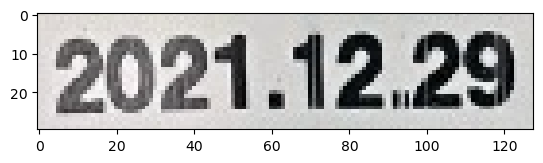

In [150]:
images = os.listdir(DATASET_PATH)

model = load_model(MODEL_NAME)

random.shuffle(images)

for image_name in images[:1]:
    image_path = os.path.join(DATASET_PATH, image_name)

    characters = segment_image(image_path)
    
    pixel_counts = []
    
    for character in characters:
        pixel_count = np.sum(character == 255, axis=0)
        pixel_counts.append(pixel_count)
 

    pred = model.predict(pixel_counts)
    
    print(pred)

    plt.imshow(cv2.imread(image_path))
    plt.show()
    
    